# P2 | Credit Card Revival

## 1.1 Introduction

This midbootcamp project will focus in a classification problem: as a risk analyst of a bank I will analyse and understand the demographics and other characteristics of the bank customer's that accept or reject a credit card offer, using linear regression.

## 1.2 Import Libraries

In [82]:
import pandas as pd
import numpy as np
import datetime
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pickle

## 1.3 Import data

In [28]:
data = pd.read_csv('creditcardmarketing.csv')

In [29]:
data.head()

Customer Number Offer Accepted     Reward Mailer Type Income Level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   # Bank Accounts Open Overdraft Protection Credit Rating  \
0                     1                   No          High   
1                     1                   No        Medium   
2                     2                   No        Medium   
3                     2                   No          High   
4                     1                   No        Medium   

   # Credit Cards Held  # Homes Owned  Household Size Own Your Home  \
0                    2              1               4            No   
1                    2              2               5           Yes   
2                    2              1               2           Yes   
3                    1              1               4            No   
4                    2              1               6           Yes   

   Average Balance  Q1 Balance  Q2 Balance  Q3 Balance  Q4 Balance  
0          1160.75      1669.0       877.0      1095.0      1002.0  
1           147.25        39.0       106.0        78.0       366.0  
2           276.50       367.0       352.0       145.0       242.0  
3          1219.00      1578.0      1760.0      1119.0       419.0  
4          1211.00      2140.0      1357.0       982.0       365.0

## 2. Explore & Cleaning data

### 2.1 Explore data

In [30]:
data.shape

(18000, 17)

In [31]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

##### Checking for null values:

In [32]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

percentage
Q4 Balance              0.133333
Q3 Balance              0.133333
Q2 Balance              0.133333
Q1 Balance              0.133333
Average Balance         0.133333
# Homes Owned           0.000000
Own Your Home           0.000000
Household Size          0.000000
Customer Number         0.000000
Offer Accepted          0.000000
Credit Rating           0.000000
Overdraft Protection    0.000000
# Bank Accounts Open    0.000000
Income Level            0.000000
Mailer Type             0.000000
Reward                  0.000000
# Credit Cards Held     0.000000

###### Note: As the columns with null values might be important to my model, I will not drop them and will deal with them later.

In [33]:
data.describe().apply(lambda x: round(x,2))

Customer Number  # Bank Accounts Open  # Credit Cards Held  \
count         18000.00              18000.00              18000.0   
mean           9000.50                  1.26                  1.9   
std            5196.30                  0.47                  0.8   
min               1.00                  1.00                  1.0   
25%            4500.75                  1.00                  1.0   
50%            9000.50                  1.00                  2.0   
75%           13500.25                  1.00                  2.0   
max           18000.00                  3.00                  4.0   

       # Homes Owned  Household Size  Average Balance  Q1 Balance  Q2 Balance  \
count       18000.00        18000.00         17976.00    17976.00    17976.00   
mean            1.20            3.50           940.52      910.45      999.39   
std             0.43            1.11           350.30      620.08      457.40   
min             1.00            1.00            48.25        0.00        0.00   
25%             1.00            3.00           787.50      392.75      663.00   
50%             1.00            3.00          1007.00      772.00     1032.00   
75%             1.00            4.00          1153.25     1521.00     1342.00   
max             3.00            9.00          3366.25     3450.00     3421.00   

       Q3 Balance  Q4 Balance  
count    17976.00    17976.00  
mean      1042.03      810.19  
std        553.45      559.00  
min          0.00        0.00  
25%        633.00      363.00  
50%        945.50      703.00  
75%       1463.00     1212.00  
max       3823.00     4215.00

#### I would like to see the unique values for each column:

In [34]:
def unique_val(df):
    for col_names in list(df):
        print("\n" + col_names)
        print(df[col_names].unique(), '\n')

In [533]:
unique_val(data)


Customer Number
[    1     2     3 ... 17998 17999 18000] 


Offer Accepted
['No' 'Yes'] 


Reward
['Air Miles' 'Cash Back' 'Points'] 


Mailer Type
['Letter' 'Postcard'] 


Income Level
['High' 'Medium' 'Low'] 


# Bank Accounts Open
[1 2 3] 


Overdraft Protection
['No' 'Yes'] 


Credit Rating
['High' 'Medium' 'Low'] 


# Credit Cards Held
[2 1 3 4] 


# Homes Owned
[1 2 3] 


Household Size
[4 5 2 6 3 1 8 9] 


Own Your Home
['No' 'Yes'] 


Average Balance
[1160.75  147.25  276.5  ...  691.   1649.   1427.25] 


Q1 Balance
[1669.   39.  367. ... 1122. 2139. 1070.] 


Q2 Balance
[ 877.  106.  352. ...   91. 1865. 1824.] 


Q3 Balance
[1095.   78.  145. ... 2265. 2045. 1037.] 


Q4 Balance
[1002.  366.  242. ... 1946. 2035. 2188.] 



### 2.2 Cleaning the data

#### Cleaning column hearders: removing spaces and special characters (#)

In [35]:
data.columns = [column.lower().replace('# ', '').replace(' ','_') for column in data.columns]

In [36]:

data.head()

customer_number offer_accepted     reward mailer_type income_level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   bank_accounts_open overdraft_protection credit_rating  credit_cards_held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   homes_owned  household_size own_your_home  average_balance  q1_balance  \
0            1               4            No          1160.75      1669.0   
1            2               5           Yes           147.25        39.0   
2            1               2           Yes           276.50       367.0   
3            1               4            No          1219.00      1578.0   
4            1               6           Yes          1211.00      2140.0   

   q2_balance  q3_balance  q4_balance  
0       877.0      1095.0      1002.0  
1       106.0        78.0       366.0  
2       352.0       145.0       242.0  
3      1760.0      1119.0       419.0  
4      1357.0       982.0       365.0

#### Exporting data to csv to be used in SQL part of the project

In [536]:
data.to_csv('/Users/ritasilva/P2-Credit-Card-Revival/data/credit_card_data.csv', index = False)

#### Dealing with null values. I have replaced by the mean.

In [37]:
data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']]=data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']].fillna(value=data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']].mean())


In [38]:
data.isnull().sum().sum()

0

#### Setting customer number as index, as it only has unique numbers.

In [39]:
data = data.set_index('customer_number')
data

offer_accepted     reward mailer_type income_level  \
customer_number                                                      
1                           No  Air Miles      Letter         High   
2                           No  Air Miles      Letter       Medium   
3                           No  Air Miles    Postcard         High   
4                           No  Air Miles      Letter       Medium   
5                           No  Air Miles      Letter       Medium   
...                        ...        ...         ...          ...   
17996                       No  Cash Back      Letter         High   
17997                       No  Cash Back      Letter         High   
17998                       No  Cash Back      Letter         High   
17999                       No  Cash Back      Letter       Medium   
18000                       No  Cash Back      Letter          Low   

                 bank_accounts_open overdraft_protection credit_rating  \
customer_number                                                          
1                                 1                   No          High   
2                                 1                   No        Medium   
3                                 2                   No        Medium   
4                                 2                   No          High   
5                                 1                   No        Medium   
...                             ...                  ...           ...   
17996                             1                   No           Low   
17997                             1                   No           Low   
17998                             1                   No           Low   
17999                             1                   No        Medium   
18000                             2                   No        Medium   

                 credit_cards_held  homes_owned  household_size own_your_home  \
customer_number                                                                 
1                                2            1               4            No   
2                                2            2               5           Yes   
3                                2            1               2           Yes   
4                                1            1               4            No   
5                                2            1               6           Yes   
...                            ...          ...             ...           ...   
17996                            1            1               5           Yes   
17997                            3            1               3           Yes   
17998                            2            1               4            No   
17999                            4            2               2           Yes   
18000                            2            1               3            No   

                 average_balance  q1_balance  q2_balance  q3_balance  \
customer_number                                                        
1                        1160.75      1669.0       877.0      1095.0   
2                         147.25        39.0       106.0        78.0   
3                         276.50       367.0       352.0       145.0   
4                        1219.00      1578.0      1760.0      1119.0   
5                        1211.00      2140.0      1357.0       982.0   
...                          ...         ...         ...         ...   
17996                     167.50       136.0        65.0        71.0   
17997                     850.50       984.0       940.0       943.0   
17998                    1087.25       918.0       767.0      1170.0   
17999                    1022.25       626.0       983.0       865.0   
18000                    1056.00       265.0      1378.0      1978.0   

                 q4_balance  
customer_number              
1                    1002.0  
2                     366.0  
3                     242.0  
4

## 3. EDA

### 3.1. Checking imbalance of data

###### I would like to see the value count for each columns, therefore I've created a function for it. Target variable (offer accepted) is imbalanced, I will deal with it in the feature engineering bit.

In [40]:
def value_count(df):
    for column in df.select_dtypes(np.object):
         print("\n" + column)
         print(df[column].value_counts())

In [41]:
value_count(data)


offer_accepted
No     16977
Yes     1023
Name: offer_accepted, dtype: int64

reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64

mailer_type
Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

income_level
Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64

overdraft_protection
No     15322
Yes     2678
Name: overdraft_protection, dtype: int64

credit_rating
High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64

own_your_home
Yes    11655
No      6345
Name: own_your_home, dtype: int64


### 3.2. Data distribution and outliers (numerical data)

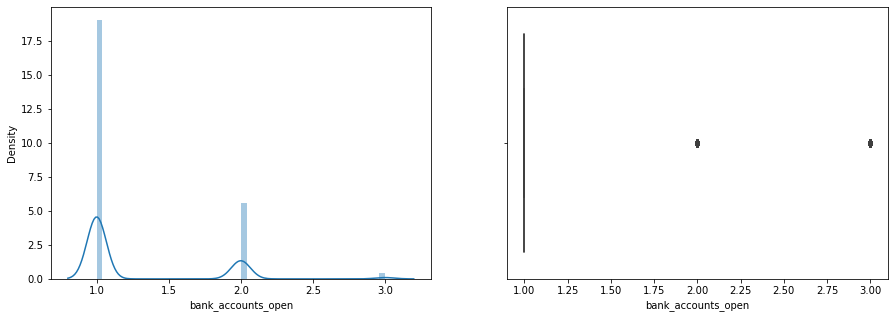

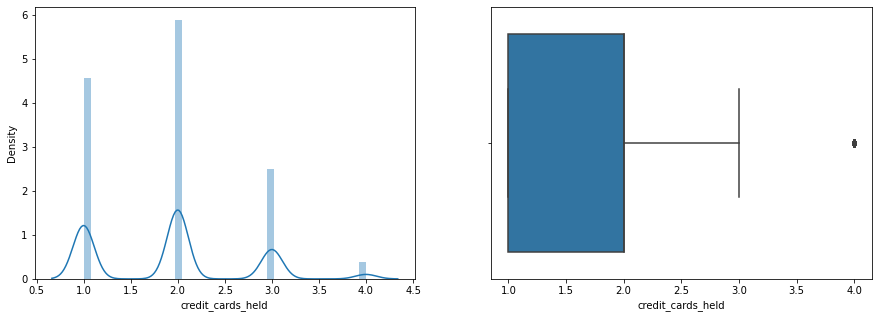

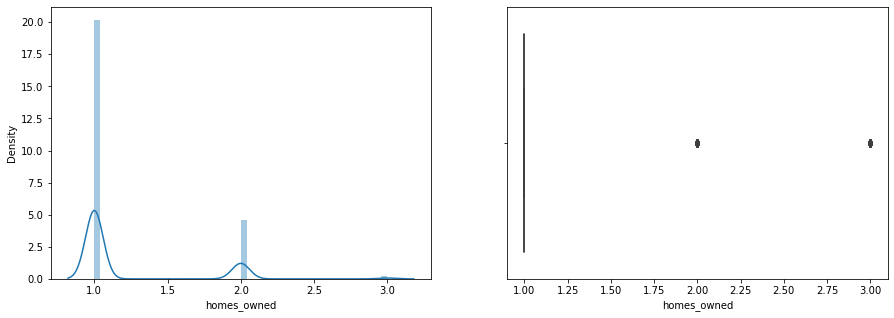

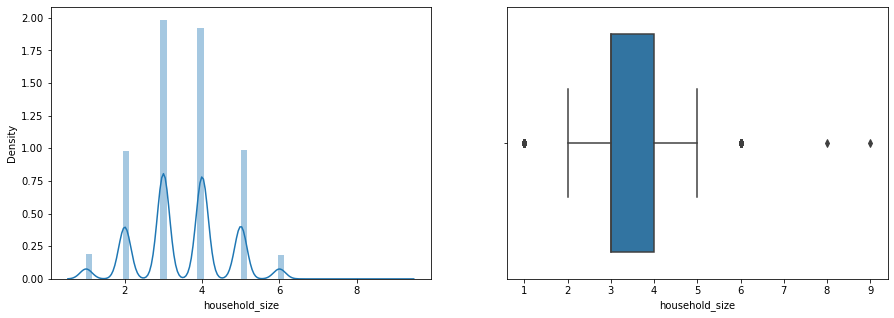

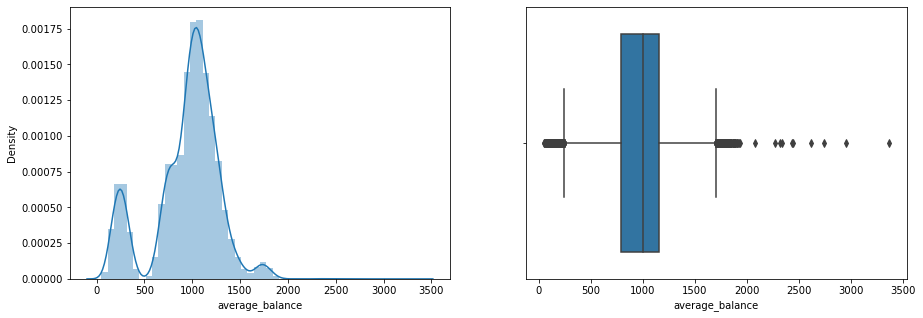

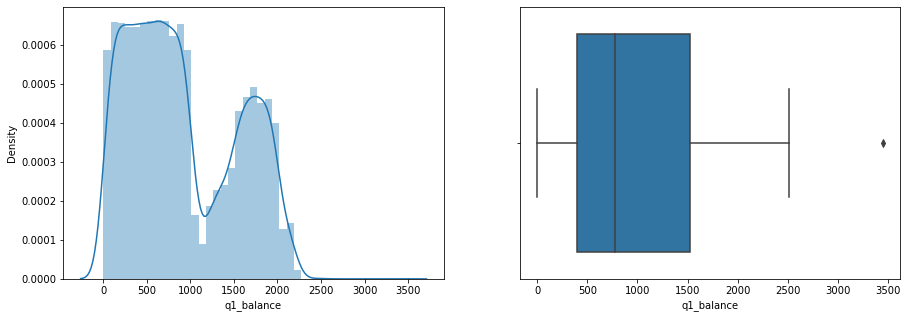

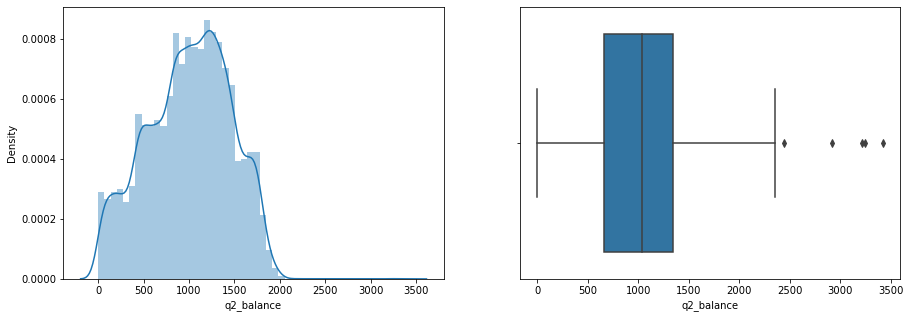

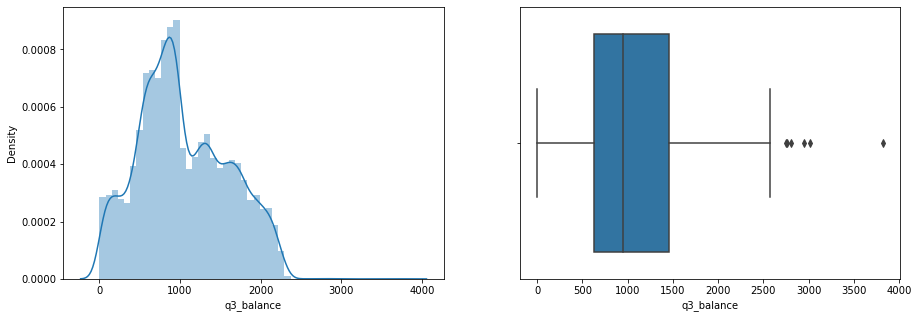

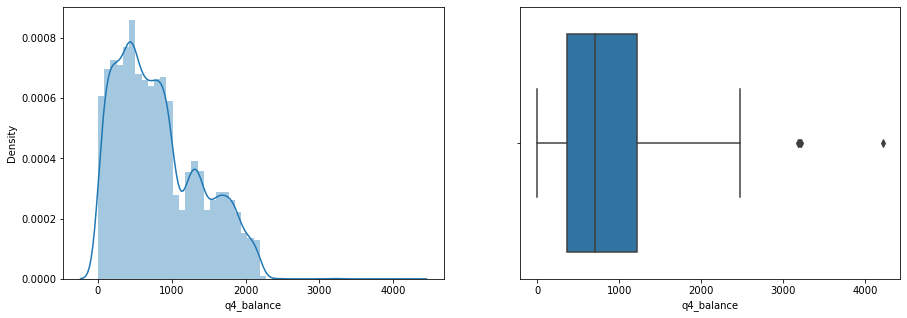

In [42]:
for col in data.select_dtypes(np.number):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(data[col], ax=axes[0])
    sns.boxplot(data[col], ax=axes[1])
    plt.show()

### Dealing with outliers.
#### I will be removing the outliers only for columns average_balance, q1,q2,q3,q4_balance as these columns are the ones with the higher numbers and more outliers. The remaining columns have small values.

In [43]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [44]:
data = remove_outliers(data, threshold=1.5, skip_columns=['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])

#### Checking the correlation between the variables

In [45]:
corr_df_model = data.select_dtypes([np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

bank_accounts_open  credit_cards_held  homes_owned  \
bank_accounts_open            1.000000           0.000159     0.006918   
credit_cards_held             0.000159           1.000000    -0.002141   
homes_owned                   0.006918          -0.002141     1.000000   
household_size                0.008847          -0.002709     0.006408   
average_balance              -0.007352           0.003615     0.021890   
q1_balance                   -0.005003          -0.006802     0.013308   
q2_balance                   -0.011363          -0.004604     0.010700   
q3_balance                    0.000236          -0.002851     0.007242   
q4_balance                   -0.001266           0.021254     0.015374   

                    household_size  average_balance  q1_balance  q2_balance  \
bank_accounts_open        0.008847        -0.007352   -0.005003   -0.011363   
credit_cards_held        -0.002709         0.003615   -0.006802   -0.004604   
homes_owned               0.006408         0.021890    0.013308    0.010700   
household_size            1.000000         0.003890   -0.001464   -0.004559   
average_balance           0.003890         1.000000    0.355071    0.717991   
q1_balance               -0.001464         0.355071    1.000000    0.379693   
q2_balance               -0.004559         0.717991    0.379693    1.000000   
q3_balance                0.009403         0.683622   -0.259829    0.340611   
q4_balance                0.004132         0.475943   -0.422322   -0.019094   

                    q3_balance  q4_balance  
bank_accounts_open    0.000236   -0.001266  
credit_cards_held    -0.002851    0.021254  
homes_owned           0.007242    0.015374  
household_size        0.009403    0.004132  
average_balance       0.683622    0.475943  
q1_balance           -0.259829   -0.422322  
q2_balance            0.340611   -0.019094  
q3_balance            1.000000    0.492074  
q4_balance            0.492074    1.000000

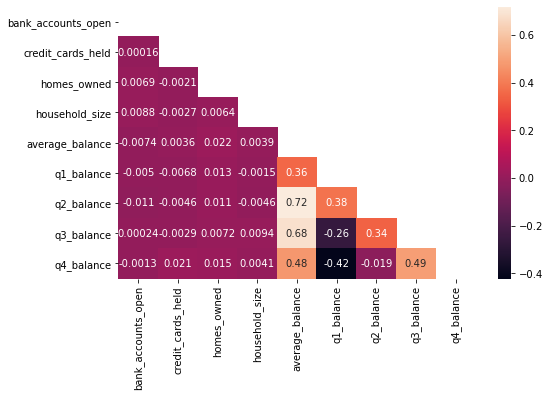

In [48]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


###### I've decided not to drop any columns based on this heatmap, as correlation is not that big.

### 3.3 Data Distribution (categorical data)

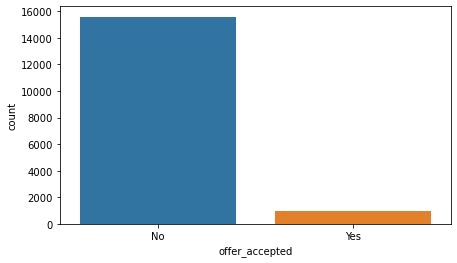

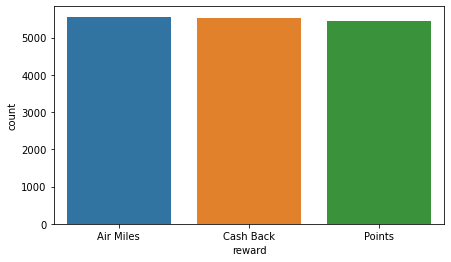

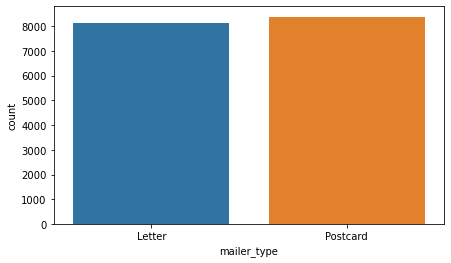

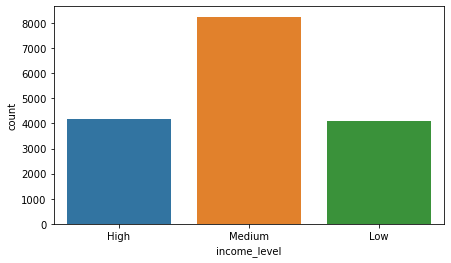

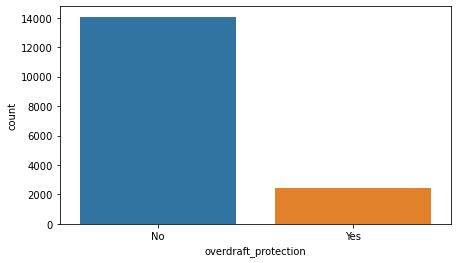

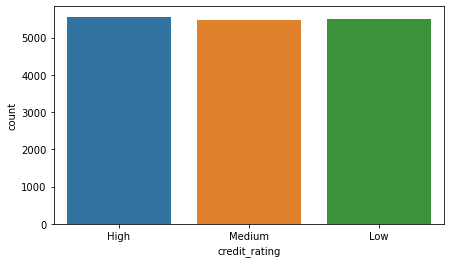

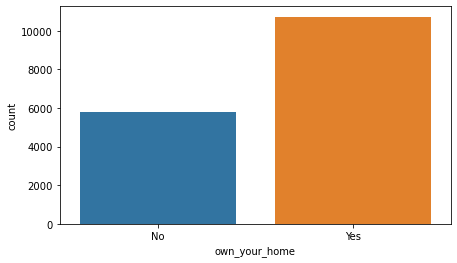

In [50]:
for col in data.select_dtypes(np.object):
    fig, axes = plt.subplots(1, figsize=(7, 4))
    sns.countplot(x=data[col], data=data)
    plt.show()
    

##### Note: As concluded before the data is imbalanced, target variable offer accepted is over represented with answer No.

## ChiSquare test

##### H0 (Null Hypothesis) - assumes that there is no association between the two variables.
##### Ha (Alternate Hypothesis) - assumes that there is an association between the two variables.

##### Degree of freedom

In [51]:
# contingency table
data_crosstab = pd.crosstab(data['offer_accepted'], data['income_level'], margins = False)
data_crosstab

income_level    High   Low  Medium
offer_accepted                    
No              4027  3750    7813
Yes              149   357     430

In [52]:
data_crosstab.shape

(2, 3)

In [53]:
#degree of freedom

(2-1)*(3-1)

2

In [56]:
chi2_contingency(data_crosstab, correction=False)

(107.92470279857727,
 3.668162415938837e-24,
 2,
 array([[3939.47960789, 3874.38763161, 7776.1327605 ],
        [ 236.52039211,  232.61236839,  466.8672395 ]]))

In [70]:
def col_cat_val(data, columns=[]):
    for i in columns:
        for j in columns:
            if i != j:
                data_crosstab = pd.crosstab(data[i], data[j], margins = False)
                print (i, j)
                print (chi2_contingency(data_crosstab, correction=False), '\n')
                
                #print(chi2_contingency(data_crosstab, correction=False), '\n')

##### It returns 4 results in this order (chi-square statistic, p value, degrees of freedom, expected frequencies matrix)
##### p value is less than 0.05 we can reject the null hypothesis (that there is no relationship between the two categorical variables); ie. there is a correlation between the two variables. Hence we can drop one of the two columns. In this case, we are going to drop the column 

In [71]:
col_cat_val(data, columns= data.select_dtypes(np.object))

offer_accepted reward
(89.87430113780236, 3.04820011738656e-20, 2, array([[5243.20585744, 5199.81120658, 5146.98293598],
       [ 314.79414256,  312.18879342,  309.01706402]])) 

offer_accepted mailer_type
(161.91223760009564, 4.323768928840716e-37, 1, array([[7678.96647707, 7911.03352293],
       [ 461.03352293,  474.96647707]])) 

offer_accepted income_level
(107.92470279857727, 3.668162415938837e-24, 2, array([[3939.47960789, 3874.38763161, 7776.1327605 ],
       [ 236.52039211,  232.61236839,  466.8672395 ]])) 

offer_accepted overdraft_protection
(0.4586630137496384, 0.4982494791724369, 1, array([[13272.15962725,  2317.84037275],
       [  796.84037275,   139.15962725]])) 

offer_accepted credit_rating
(407.640092604524, 3.0344402449543025e-89, 2, array([[5243.20585744, 5179.05724313, 5167.73689943],
       [ 314.79414256,  310.94275687,  310.26310057]])) 

offer_accepted own_your_home
(0.10070374794080833, 0.7509867379519612, 1, array([[ 5471.4994554, 10118.5005446],
       [  32

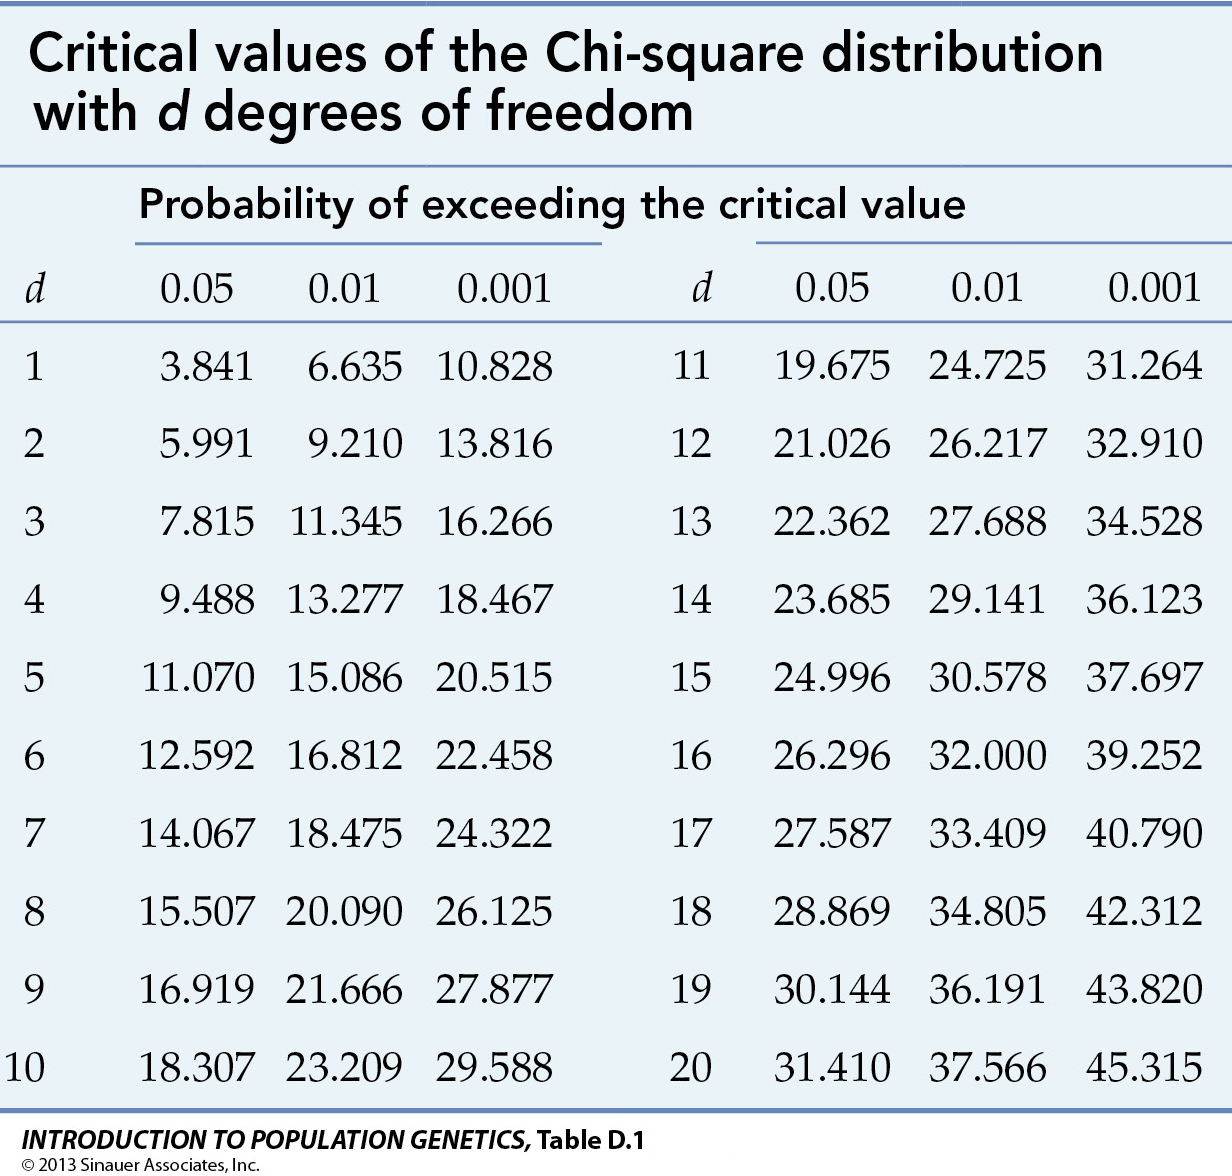

In [73]:
from IPython import display

display.Image("https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg", width=500, height=500)

In [ ]:
## 1- Cleaning null, duplicates, columns ..
### 2-  Remove outliers
### 3- Check correlation
### 4- Separate numerical and categorical variables
5- Check normality and transform the data if necessary
6- Transform categorical variables
7- Train/split
8- Split the model
9- Prediction (edited) 

## Data Processing & feature engineering

### BoxCox transformation

##### I want to apply boxcox tranformation to columns average_balance, q1_balance, q2_balance, q3_balance, q4_balance as the other columns have small numbers.

In [86]:
def boxcox_transform(data, skip_columns=[]):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        if column not in skip_columns:
        # since i know any columns should take negative numbers, to avoid -inf in df
            data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
            data[column] = data[column].fillna(data[column].mean())
            transformed_data, ci = stats.boxcox(data[column])
            data[column] = transformed_data
            _ci[column] = [ci] 
        return data, _ci


In [87]:
data, _ci = boxcox_transform(data, skip_columns = ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])
data

offer_accepted     reward mailer_type income_level  \
customer_number                                                      
1                           No  Air Miles      Letter         High   
3                           No  Air Miles    Postcard         High   
4                           No  Air Miles      Letter       Medium   
5                           No  Air Miles      Letter       Medium   
6                           No  Air Miles      Letter       Medium   
...                        ...        ...         ...          ...   
17995                       No  Air Miles    Postcard       Medium   
17997                       No  Cash Back      Letter         High   
17998                       No  Cash Back      Letter         High   
17999                       No  Cash Back      Letter       Medium   
18000                       No  Cash Back      Letter          Low   

                 bank_accounts_open overdraft_protection credit_rating  \
customer_number                                                          
1                                 1                   No          High   
3                                 2                   No        Medium   
4                                 2                   No          High   
5                                 1                   No        Medium   
6                                 1                   No          High   
...                             ...                  ...           ...   
17995                             1                   No           Low   
17997                             1                   No           Low   
17998                             1                   No           Low   
17999                             1                   No        Medium   
18000                             2                   No        Medium   

                 credit_cards_held  homes_owned  household_size own_your_home  \
customer_number                                                                 
1                                2            1               4            No   
3                                2            1               2           Yes   
4                                1            1               4            No   
5                                2            1               6           Yes   
6                                3            1               4            No   
...                            ...          ...             ...           ...   
17995                            2            1               2           Yes   
17997                            3            1               3           Yes   
17998                            2            1               4            No   
17999                            4            2               2           Yes   
18000                            2            1               3            No   

                 average_balance  q1_balance  q2_balance  q3_balance  \
customer_number                                                        
1                        1160.75      1669.0       877.0      1095.0   
3                         276.50       367.0       352.0       145.0   
4                        1219.00      1578.0      1760.0      1119.0   
5                        1211.00      2140.0      1357.0       982.0   
6                        1114.75      1847.0      1365.0       750.0   
...                          ...         ...         ...         ...   
17995                     985.25       295.0       917.0      1608.0   
17997                     850.50       984.0       940.0       943.0   
17998                    1087.25       918.0       767.0      1170.0   
17999                    1022.25       626.0       983.0       865.0   
18000                    1056.00       265.0      1378.0      1978.0   

                 q4_balance  
customer_number              
1                    1002.0  
3                     242.0  
4                     419.0  
5

#### For column household_size I will drop the outliers above 6 as there's only two rows (8 & 9).

In [88]:
data = data[data['household_size'] < 8]

In [89]:
data['household_size'].value_counts()

3    5281
4    5074
5    2618
2    2569
1     495
6     488
Name: household_size, dtype: int64

## 4. Train-test split

In [91]:
X = data.drop('offer_accepted', axis=1)
y = data['offer_accepted']

In [96]:
X = pd.get_dummies(X)
X.head()

bank_accounts_open  credit_cards_held  homes_owned  \
customer_number                                                       
1                                 1                  2            1   
3                                 2                  2            1   
4                                 2                  1            1   
5                                 1                  2            1   
6                                 1                  3            1   

                 household_size  average_balance  q1_balance  q2_balance  \
customer_number                                                            
1                             4          1160.75      1669.0       877.0   
3                             2           276.50       367.0       352.0   
4                             4          1219.00      1578.0      1760.0   
5                             6          1211.00      2140.0      1357.0   
6                             4          1114.75      1847.0      1365.0   

                 q3_balance  q4_balance  reward_Air Miles  ...  \
customer_number                                            ...   
1                    1095.0      1002.0                 1  ...   
3                     145.0       242.0                 1  ...   
4                    1119.0       419.0                 1  ...   
5                     982.0       365.0                 1  ...   
6                     750.0       497.0                 1  ...   

                 income_level_High  income_level_Low  income_level_Medium  \
customer_number                                                             
1                                1                 0                    0   
3                                1                 0                    0   
4                                0                 0                    1   
5                                0                 0                    1   
6                                0                 0                    1   

                 overdraft_protection_No  overdraft_protection_Yes  \
customer_number                                                      
1                                      1                         0   
3                                      1                         0   
4                                      1                         0   
5                                      1                         0   
6                                      1                         0   

                 credit_rating_High  credit_rating_Low  credit_rating_Medium  \
customer_number                                                                
1                                 1                  0                     0   
3                                 0                  0                     1   
4                                 1                  0                     0   
5                                 0                  0                     1   
6                                 1                  0                     0   

                 own_your_home_No  own_your_home_Yes  
customer_number                                       
1                               1                  0  
3                               0                  1  
4                               1                  0  
5                               0                  1  
6                               1                  0  

[5 rows x 24 columns]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [98]:
transformer = StandardScaler()
transformer.fit(X_train_num)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)


## 5. Logist regression

### 5.1. Model with imbalanced data

In [100]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [101]:
classification.score(X_test, y_test)

0.9449319213313162

In [102]:
predictions = classification.predict(X_test)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [103]:
confusion_matrix(y_test, predictions)

array([[3123,    0],
       [ 182,    0]])

In [104]:
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[3123,    0],
       [ 182,    0]])

<AxesSubplot:>

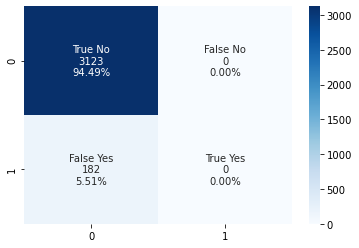

In [105]:
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [108]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(classification, X_test, y_test, n_classes=4, figsize=(16, 10))

IndexError: index 2 is out of bounds for axis 1 with size 2

#### Conclusion: 
##### The model got a very high score 0.94 due to data imbalance. It could not predict any True Yes and the majority class here is No.

### 5.2. Model with data imbalance method

#### 5.2. Smote

In [109]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Yes    12466
No     12466
Name: offer_accepted, dtype: int64

In [110]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [111]:
classification.score(X_test, y_test)

0.9443267776096823

In [112]:
predictions = classification.predict(X_test)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [113]:
confusion_matrix(y_test, predictions)

array([[3121,    2],
       [ 182,    0]])

<AxesSubplot:>

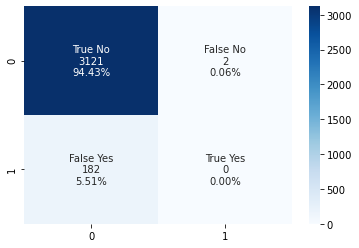

In [114]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [118]:
   #ROC-AUC
y_probas = classification.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()
    
#classification report
metrics_class = metrics.classification_report(y_test, predictions)
print('Classification report:', '\n')
print(metrics_class)

NameError: name 'skplt' is not defined

#### Conclusion
Smote method also seems not be very effective in predidicting 

#### 5.2. Class weight

In [119]:
classification = LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced')
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.6499243570347958

In [120]:
predictions = classification.predict(X_test)
predictions

array(['No', 'Yes', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [121]:
confusion_matrix(y_test, predictions)

array([[2009, 1114],
       [  43,  139]])

<AxesSubplot:>

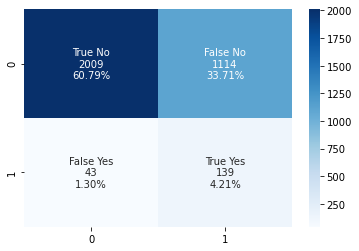

In [122]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Testing the model with KNN and data imbalanced

In [126]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_sm, y_sm)

KNeighborsClassifier(n_neighbors=4)

In [127]:
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
score

0.7633888048411498

#### Choosing the best value of k

In [128]:
scores = []
for i in range(2,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_sm, y_sm)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

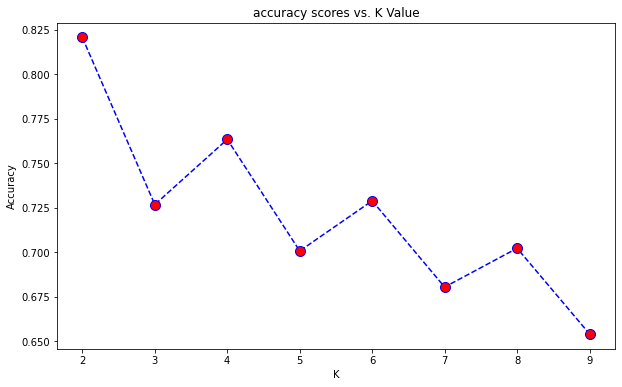

In [129]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [173]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

ValueError: could not convert string to float: 'Air Miles'

## Feature Engineering

### Normalizing the data

In [168]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

KeyError: ('average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance')

In [170]:
smote = SMOTE()



ValueError: could not convert string to float: 'Air Miles'